# Private School Fee Analysis in Nepal

#### Project Description
This project involves a comprehensive quantitative analysis of private school fees across Nepal using simulated data. A dataset of 5,000 records is generated, containing features such as tuition fees, school level, location, admission fees, and student-teacher ratios. To provide hands-on experience with data preparation, the dataset includes various data wrangling issues such as missing values, text in numeric columns, duplicates, formatting inconsistencies, and outliers.

The project focuses first on data cleaning using techniques like type conversion, imputation, outlier detection, and string normalization. After cleaning, exploratory data analysis (EDA) is conducted to uncover trends and disparities in school fees across regions and levels.

Furthermore, machine learning models are applied to predict school fees and classify schools based on quantitative features. Algorithms such as linear regression, decision trees, and clustering are explored to extract patterns and make data-driven insights. This end-to-end project strengthens skills in data cleaning, EDA, and ML modeling—providing practical experience relevant to real-world educational and policy analysis.


#### 1. Data Cleaning

##### a. Load Data

In [13]:
import pandas as pd

# loading a DataFrame
df = pd.read_csv('Anupama_Wrangled_School_Fee_Dataset.csv')
# Give the information on datasets

print("Missing values per column:\n", df.isnull().sum())
# Checks  if there are any null values in the dataset in each columns

# Result:  Admission Fee (NPR) and Technology Access Index

Missing values per column:
 Annual Tuition Fee (NPR)        0
Admission Fee (NPR)           253
Monthly Fee (NPR)               0
Infrastructure Score            0
Student-Teacher Ratio           0
Average Academic Score (%)      0
Total Enrolled Students         0
Scholarship % Availability      0
Technology Access Index       253
Fee Increase % (YoY)            0
dtype: int64


##### b. Clean Data

##### Wrangling Issues
- Missing values :  Admission Fee, Technology Access Index
- Wrong data types : 'four thousand' in Monthly Fee (NPR)
- Formatting issues : Extra spaces in Student-Teacher Ratio
- Duplicate rows : 30 exact duplicates added
- Outliers : Some Annual Tuition Fee values multiplied by 10

##### Step 1: Fixing missing values (null) with median and mean values

In [14]:
# Calculate the mean values (ignoring NaNs)
admission_fee_mean = df['Admission Fee (NPR)'].median()
tech_access_mean = df['Technology Access Index'].mean()

# Fill missing values with the mean
df['Admission Fee (NPR)'] = df['Admission Fee (NPR)'].fillna(admission_fee_mean)
df['Technology Access Index'] = df['Technology Access Index'].fillna(tech_access_mean)

# Check missing values again to confirm
print(df.isnull().sum())
# Result: no null values 

Annual Tuition Fee (NPR)      0
Admission Fee (NPR)           0
Monthly Fee (NPR)             0
Infrastructure Score          0
Student-Teacher Ratio         0
Average Academic Score (%)    0
Total Enrolled Students       0
Scholarship % Availability    0
Technology Access Index       0
Fee Increase % (YoY)          0
dtype: int64


#####  Step 2. Fixing wrong data types in  'four thousand' in Monthly Fee (NPR)

In [15]:
import pandas as pd
from word2number import w2n

# Sample DataFrame
# df = pd.DataFrame({'Monthly Fee (NPR)': ['two thousand', '1500', 'five hundred', '3000', 'one thousand five hundred']})

def convert_to_number(value):
    try:
        return w2n.word_to_num(value)
    except:
        try:
            return float(value)  # Try converting directly if it's already a number
        except:
            return None  # Set invalid entries to None/NaN

df['Monthly Fee (NPR)'] = df['Monthly Fee (NPR)'].astype(str).apply(convert_to_number)

##### Step 3. Fixing Formatting issues i.e. Extra spaces in Student-Teacher Ratio

In [16]:
# Step 1: Convert to string and strip spaces
df['Student-Teacher Ratio'] = df['Student-Teacher Ratio'].astype(str).str.strip()

# Step 2: Convert to numeric, replacing invalid entries with NaN
df['Student-Teacher Ratio'] = pd.to_numeric(df['Student-Teacher Ratio'], errors='coerce')

# Step 3: Fill NaNs with the column mean (optional, if needed)
ratio_mean = df['Student-Teacher Ratio'].mean()
df['Student-Teacher Ratio'] = df['Student-Teacher Ratio'].fillna(ratio_mean)

# Optional: Check for any missing or incorrectly formatted values
print("Remaining NaNs in Student-Teacher Ratio:", df['Student-Teacher Ratio'].isnull().sum())

# Result: Remaining NaNs in Student-Teacher Ratio: 0

Remaining NaNs in Student-Teacher Ratio: 0


##### Step 4. Find and Removing the duplicate rows  (30 exact duplicates added)

In [17]:
# Step 1. Find and display duplicates
duplicates = df[df.duplicated()]
print(duplicates)
print("Total duplicate rows:", len(duplicates))
# Result : shows all the duplicate values of rows

      Annual Tuition Fee (NPR)  Admission Fee (NPR)  Monthly Fee (NPR)  \
5000                     46267              12507.0               3564   
5001                     49093              10539.0               3890   
5002                     23221               3797.0               3770   
5003                     50553               9955.0               4586   
5004                     64424              14021.0               5209   
5005                     68053              11590.0               5197   
5006                     70591               9955.0               4304   
5007                     57508               9157.0               2746   
5008                     60450               7464.0               4278   
5009                     58146              13442.0               5789   
5010                     47616              11707.0               4076   
5011                     53469               6571.0               4000   
5012                     52408        

In [18]:
# Step 2: Count number of duplicates
print("Number of duplicate rows:", duplicates.shape[0])

# Step 3: Remove duplicates
df = df.drop_duplicates()
 
#Result: Number of duplicate rows: 30

Number of duplicate rows: 30


In [19]:
# Find and display duplicates
duplicates = df[df.duplicated()]
print("Total duplicate rows:", len(duplicates))
# Result: Total duplicate rows: 0

Total duplicate rows: 0


##### Step 5. Finding and Fixing outlier in Annual Tution Fee

In [20]:
# Step 1: Calculate IQR
Q1 = df['Annual Tuition Fee (NPR)'].quantile(0.25)
Q3 = df['Annual Tuition Fee (NPR)'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Find outliers
outliers = df[(df['Annual Tuition Fee (NPR)'] < lower_bound) | 
              (df['Annual Tuition Fee (NPR)'] > upper_bound)]
print("Outliers detected:", len(outliers))

# Result: Outliers detected: 50

Outliers detected: 50


In [21]:
# Cap outliers : Filling the correct values instead of outliers
df['Annual Tuition Fee (NPR)'] = df['Annual Tuition Fee (NPR)'].clip(lower=lower_bound, upper=upper_bound)

##### c. Write new File

In [22]:
# 4. Save the updated DataFrame to a new CSV file
df.to_csv('cleaned_data.csv', index=False)

#### 2. Scientific analysis using Scipy

Use Case 1: Summary Statistics (Mean, Median and Mode)
-Annual Tuition Fee, Monthly Fee, and Student-Teacher Ratio.


In [23]:
from scipy import stats

mean_fee = df['Annual Tuition Fee (NPR)'].mean()
median_fee = df['Annual Tuition Fee (NPR)'].median()
mode_fee = stats.mode(df['Annual Tuition Fee (NPR)'], keepdims=True)
print(f'Mean: {mean_fee} \nMedian: {median_fee} \nMode: {mode_fee[0]}')
#Result:
# Mean: 50488.82615 
# Median: 50374.5 
# Mode: [84631.875]


Mean: 50488.82615 
Median: 50374.5 
Mode: [84631.875]


In [24]:
mean_fee = df['Monthly Fee (NPR)'].mean()
median_fee = df['Monthly Fee (NPR)'].median()
mode_fee = stats.mode(df['Monthly Fee (NPR)'], keepdims=True)
print(f'Mean: {mean_fee} \nMedian: {median_fee} \nMode: {mode_fee[0]}')
# Result:
# Mean: 4001.553 
# Median: 4000.0 
# Mode: [4000]


Mean: 4001.553 
Median: 4000.0 
Mode: [4000]


In [25]:
mean_fee = df['Student-Teacher Ratio'].mean()
median_fee = df['Student-Teacher Ratio'].median()
mode_fee = stats.mode(df['Student-Teacher Ratio'], keepdims=True)
print(f'Mean: {mean_fee} \nMedian: {median_fee} \nMode: {mode_fee[0]}')
# Result:
# Mean: 24.924413847624603 
# Median: 24.832648281314885 
# Mode: [10.]


Mean: 24.924413847624603 
Median: 24.832648281314885 
Mode: [10.]


Use Case 2: Z-Test (One Sample)
- Check if the average monthly fee significantly differs from a known standard (e.g., NPR 4000 (Median)).

In [26]:
from scipy.stats import zscore
import numpy as np
sample_mean=df['Monthly Fee (NPR)'].mean()
population_mean=4000
SD=df['Monthly Fee (NPR)'].std()
n=len(df['Monthly Fee (NPR)'])

z = (sample_mean - population_mean) / (SD / np.sqrt(n))
print(f"Z-score: {z:.2f}")

z_critical = 1.96   # z_critical means table value
if abs(z) > z_critical:
    print("There is a significant difference. Reject Null Hypothesis")
else:
    print("No significant difference.")

#Result : Z-score: 0.11
# No significant difference.

Z-score: 0.11
No significant difference.


Use Case 3: T-Test (Independent Samples)
- Are schools with high scholarship availability charging significantly different tuition than those with low scholarship availability?      compare between subsets
-  Interpretation:
- If p_val < 0.05 → Reject the null hypothesis → Significant difference in tuition fees between the two groups.
- If p_val ≥ 0.05 → Fail to reject the null hypothesis → No significant difference detected.

In [ ]:
from scipy.stats import ttest_ind

high_scholar = df[df['Scholarship % Availability'] >= 20]['Annual Tuition Fee (NPR)']
low_scholar = df[df['Scholarship % Availability'] < 20]['Annual Tuition Fee (NPR)']

t_stat, p_val = ttest_ind(high_scholar, low_scholar, nan_policy='omit')
print(f't-value:{t_stat},p-value: {p_val}')
if p_val< 0.05:
    print('Reject null hypothesis. There is significant difference between tution fee.')
else:
    print('There is no significant difference')

#Result: 
# t-value:0.1140332943788666,p-value: 0.9092159807618077
# There is no significant difference

t-value:0.1140332943788666,p-value: 0.9092159807618077
There is no significant difference


Use Case 4:  Chi-Square Test (on Binned Fee Categories) : degree of goodness
- Check if fee groups (Low, Mid, High) are associated with access to technology levels (Low, Mid, High).


In [28]:
# Binning fees and tech index
import pandas as pd
from scipy.stats import chi2_contingency
fee_group = pd.qcut(df['Annual Tuition Fee (NPR)'], q=3, labels=['Low', 'Mid', 'High'])
tech_group = pd.qcut(df['Technology Access Index'], q=3, labels=['Low', 'Mid', 'High'])

contingency = pd.crosstab(fee_group, tech_group)
chi2, p, dof, expected = chi2_contingency(contingency)

print("Contingency Table (Fees × Tech Index):")
print(contingency, "\n")
# Result: 
# Contingency Table (Fees × Tech Index):
# Technology Access Index   Low  Mid  High
# Annual Tuition Fee (NPR)                
# Low                       559  547   561
# Mid                       559  562   545
# High                      549  557   561


Contingency Table (Fees × Tech Index):
Technology Access Index   Low  Mid  High
Annual Tuition Fee (NPR)                
Low                       559  547   561
Mid                       559  562   545
High                      549  557   561 



In [29]:
print(f"Chi-square statistic: {chi2:.3f}")
print(f"p-value: {p:.3f}")
print(f"Degrees of freedom: {dof}\n")

print("Expected Frequencies (under H₀):")
print(pd.DataFrame(expected, 
                   index=['Low Fee','Mid Fee','High Fee'], 
                   columns=['Low Tech','Mid Tech','High Tech']))

if p_val< 0.05:
    print('Reject null hypothesis. fee groups (Low, Mid, High) are not associated with access to technology levels (Low, Mid, High).')
else:
    print('There is no significant difference. So fee groups (Low, Mid, High) are associated with access to technology levels (Low, Mid, High)')

# Result:
# Chi-square statistic: 0.6369
# p-value: 0.9589
# Degrees of freedom: 4

# Expected Frequencies (under H₀):
#           Low Tech  Mid Tech  High Tech
# Low Fee   555.7778  555.4444   555.7778
# Mid Fee   555.4444  555.1112   555.4444
# High Fee  555.7778  555.4444   555.7778
# There is no significant difference. So fee groups (Low, Mid, High) are associated with access to technology levels (Low, Mid, High)

Chi-square statistic: 0.637
p-value: 0.959
Degrees of freedom: 4

Expected Frequencies (under H₀):
          Low Tech  Mid Tech  High Tech
Low Fee   555.7778  555.4444   555.7778
Mid Fee   555.4444  555.1112   555.4444
High Fee  555.7778  555.4444   555.7778
There is no significant difference. So fee groups (Low, Mid, High) are associated with access to technology levels (Low, Mid, High)


Use Case 5: Correlation (Pearson & Spearman)
1. Is there a linear relationship between Annual Tuition Fee (NPR) and Infrastructure Score?
2. Do Student-Teacher Ratio and Average Academic Score (%) move together?

1. Is there a linear relationship between Annual Tuition Fee (NPR) and Infrastructure Score?

In [30]:
from scipy.stats import pearsonr
pearsonr_corr, p_val=pearsonr(df['Annual Tuition Fee (NPR)'], df['Infrastructure Score'])
print('Pearson Correlation: Annual Tution Fee vs Infrastructure Score')
print(f'Correlation Coefficient (r): {pearsonr_corr:.4f}')
print(f'p_val: {p_val:.4f}')

# Interpretation
if p_val< 0.05:
    print('There is a statistically significant linear relationship')
else:
    print('There is no statistically significant linear relationship.')

# Result:
# Pearson Correlation: Annual Tution Fee vs Infrastructure Score
# Correlation Coefficient (r): -0.0115
# p_val: 0.4160
# There is no statistically significant linear relationship.

Pearson Correlation: Annual Tution Fee vs Infrastructure Score
Correlation Coefficient (r): -0.0115
p_val: 0.4160
There is no statistically significant linear relationship.


2. Do Student-Teacher Ratio and Average Academic Score (%) move together?

In [31]:
from scipy.stats import spearmanr
spearmanr_corr, p_val= spearmanr(df['Student-Teacher Ratio'], df['Average Academic Score (%)'])
# Output Result
print('Spearman Correlation: Student-Teacher Ratio Vs Average Academic Average Score')
print(f'Correlation coefficient (ρ): {spearmanr_corr:.4f}')
print(f'p-value: {p_val:.4f}')
#Interpretation
if p_val<0.005:
    print('There is statistically significant monotonic relationship.')
else:
    print('There is no statistically significant monotonic relationship.')

# Result:
# Spearman Correlation: Student-Teacher Ratio Vs Average Academic Average Score
# Correlation coefficient (ρ): 0.0046
# p-value: 0.7476
# There is no statistically significant monotonic relationship.

Spearman Correlation: Student-Teacher Ratio Vs Average Academic Average Score
Correlation coefficient (ρ): 0.0046
p-value: 0.7476
There is no statistically significant monotonic relationship.


Usse Case 6: Shapiro-Wilk Test (Normality Test)   :normalization test/ how optimal are they
- Test if Average Academic Score follows a normal distribution.
- p > 0.05: Likely normal
- p <= 0.05: Not normally distributed 

In [32]:
from scipy.stats import shapiro

stat, p = shapiro(df['Average Academic Score (%)'].sample(500, random_state=1))
if p> 0.05:
    print('It is normally distributed.')
else:
    print('It is not normally distributed.')

# Result: It is normally distributed.


It is normally distributed.


#### 3. Data Visualization (Plotting, Charting, Seaborn)
Visualization Lab: School Fee Analysis in Nepal (Private Schools)
This lab demonstrates 10 different visualization use cases based on the cleaned, quantitative dataset of private schools in Nepal. Each section includes the use case, its purpose, and the full Python code using matplotlib and seaborn.


1. Distribution of Annual Tuition Fee (Histogram)
Purpose: To understand how tuition fees are spread across schools and whether the distribution is normal, skewed, or multi-modal.


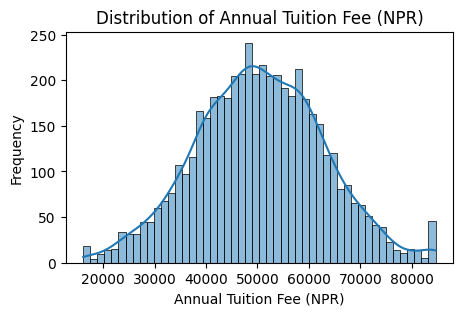

In [33]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('cleaned_data.csv') 

plt.figure(figsize=(5,3))
sns.histplot(df['Annual Tuition Fee (NPR)'], bins=50, kde=True)
plt.title('Distribution of Annual Tuition Fee (NPR)')
plt.xlabel('Annual Tuition Fee (NPR)')
plt.ylabel('Frequency')
plt.show()


2. Boxplot of Monthly Fees to Detect Outliers
Purpose: To detect outliers and visualize spread, median, and quartiles of monthly fees.


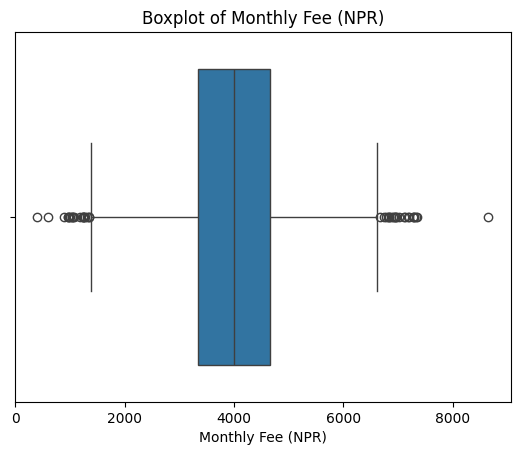

In [34]:
plt.figure()
sns.boxplot(x=df['Monthly Fee (NPR)'])
plt.title('Boxplot of Monthly Fee (NPR)')
plt.xlabel('Monthly Fee (NPR)')
plt.show()

3. Scatter Plot: Infrastructure Score vs Tuition Fee
Purpose: To see if schools with better infrastructure tend to charge higher tuition fees.


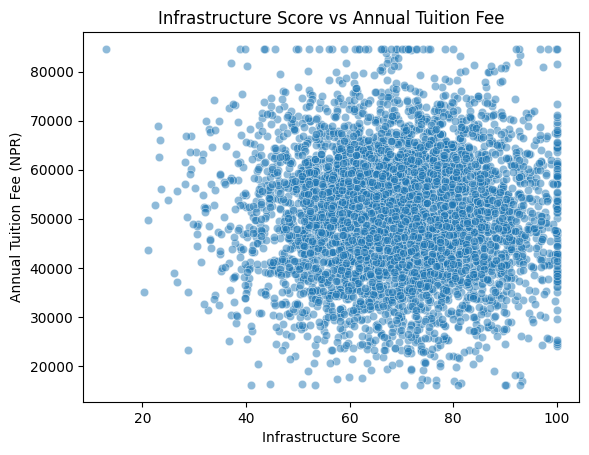

In [35]:
sns.scatterplot(x='Infrastructure Score', y='Annual Tuition Fee (NPR)', data=df, alpha=0.5)
plt.title('Infrastructure Score vs Annual Tuition Fee')
plt.xlabel('Infrastructure Score')
plt.ylabel('Annual Tuition Fee (NPR)')
plt.show()


4. Correlation Heatmap of All Quantitative Features
Purpose: To identify which variables are positively or negatively correlated.


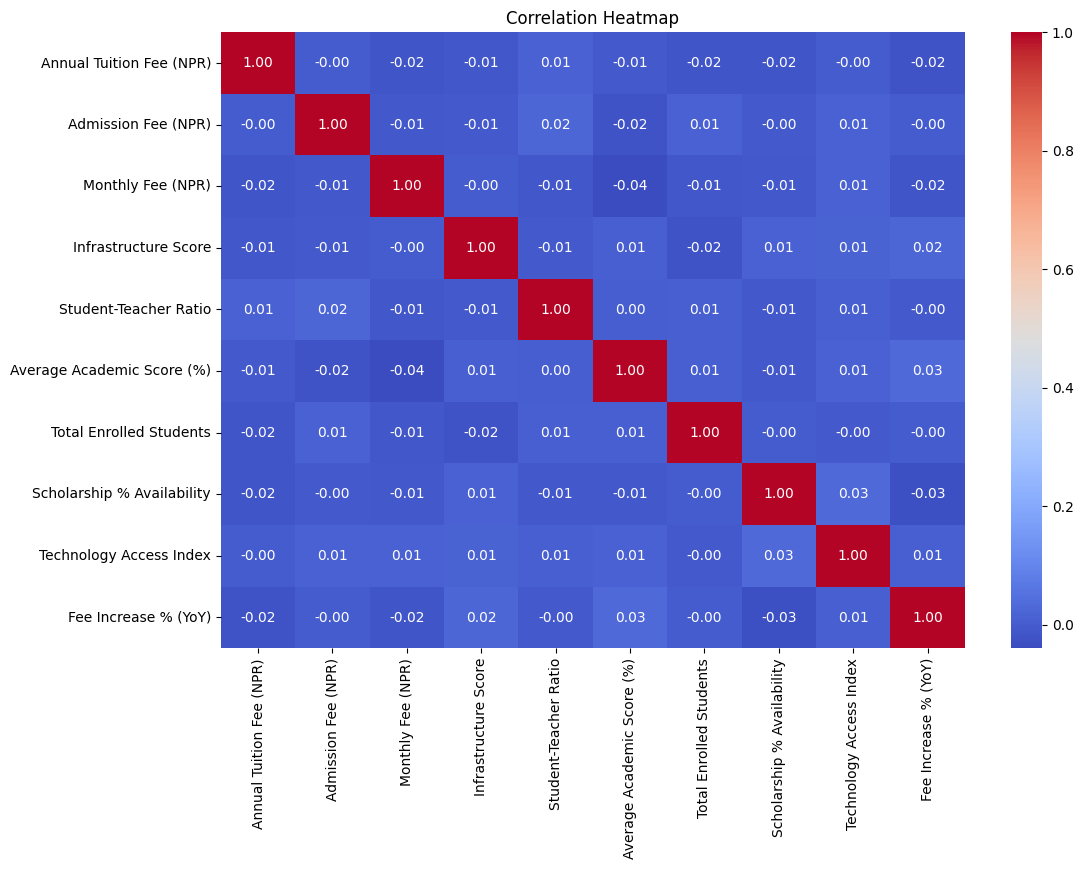

In [36]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

5. Pairplot of Selected Key Features
Purpose: To explore pairwise relationships and distributions between multiple variables.


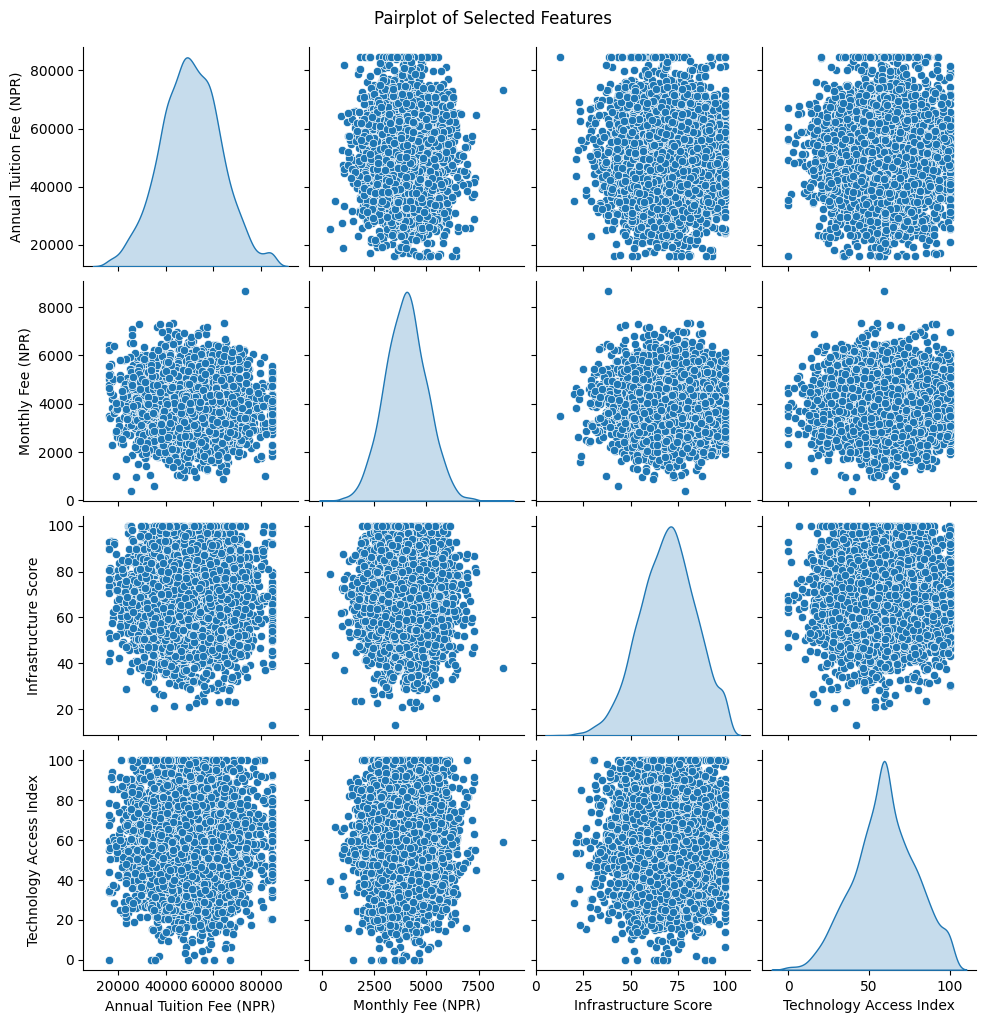

In [37]:
sns.pairplot(df[['Annual Tuition Fee (NPR)', 'Monthly Fee (NPR)',
                 'Infrastructure Score', 'Technology Access Index']].dropna(), diag_kind='kde')
plt.suptitle('Pairplot of Selected Features', y=1.02)
plt.show()

6. Bar Plot of Fee Increase % by Scholarship Level
Purpose: To analyze the relationship between scholarship levels and fee hikes.


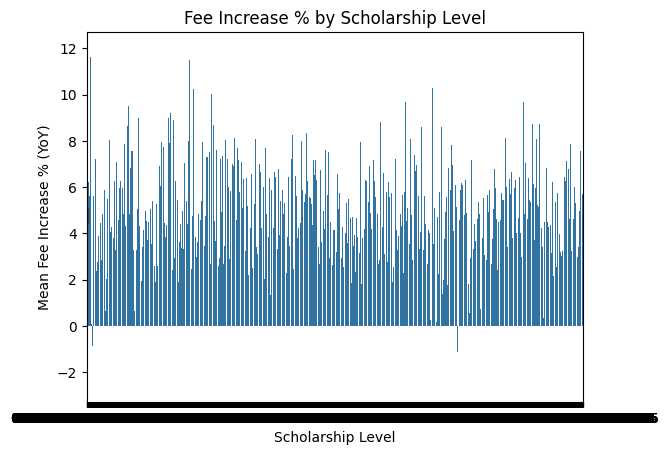

In [39]:
import numpy as np
sns.barplot(x='Scholarship % Availability', y='Fee Increase % (YoY)', data=df, estimator=np.mean)
plt.title('Fee Increase % by Scholarship Level')
plt.xlabel('Scholarship Level')
plt.ylabel('Mean Fee Increase % (YoY)')
plt.show()

7. Line Plot: Tuition Fee vs Average Academic Score
Purpose: To examine if academic performance improves with increasing tuition.


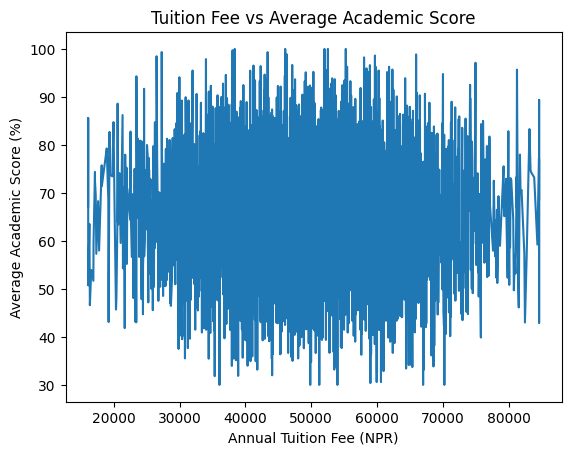

In [40]:
sorted_df = df.sort_values('Annual Tuition Fee (NPR)')
plt.plot(sorted_df['Annual Tuition Fee (NPR)'], sorted_df['Average Academic Score (%)'])
plt.title('Tuition Fee vs Average Academic Score')
plt.xlabel('Annual Tuition Fee (NPR)')
plt.ylabel('Average Academic Score (%)')
plt.show()


8. Histogram of Student-Teacher Ratio
Purpose: To assess teaching efficiency and staffing variations across schools.


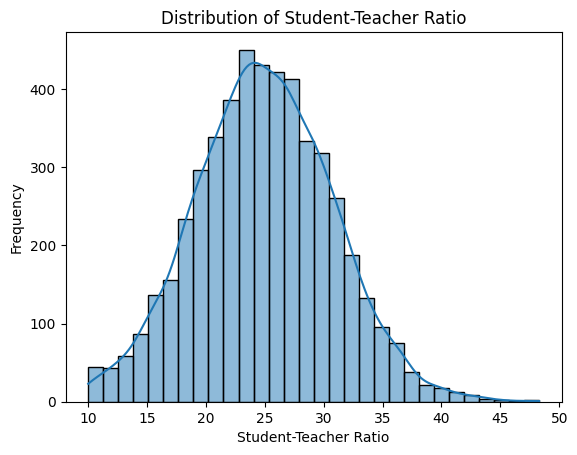

In [41]:
sns.histplot(df['Student-Teacher Ratio'], bins=30, kde=True)
plt.title('Distribution of Student-Teacher Ratio')
plt.xlabel('Student-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()


9. Violin Plot for Technology Access Index
Purpose: To visualize the full distribution and density of the tech access index.


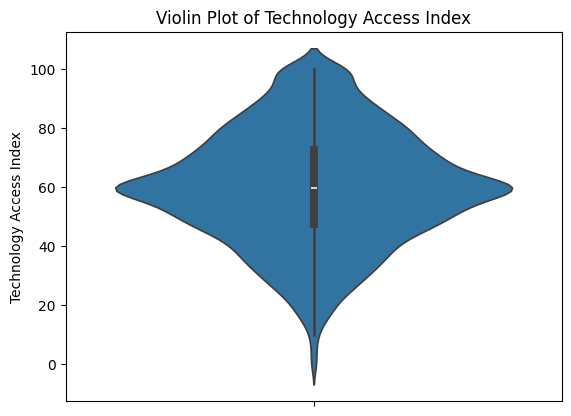

In [42]:
plt.figure()
sns.violinplot(y=df['Technology Access Index'])
plt.title('Violin Plot of Technology Access Index')
plt.ylabel('Technology Access Index')
plt.show()


10. Countplot of Enrollment Group Sizes
Purpose: To see how schools are distributed based on Number of Schools.

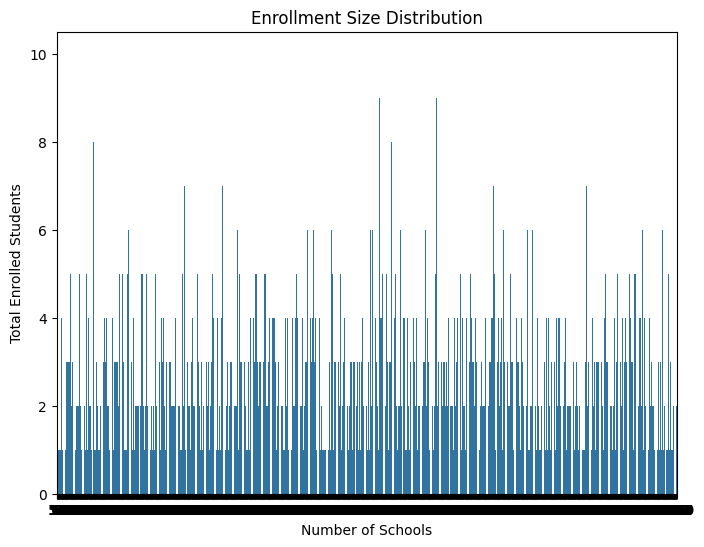

In [50]:
plt.figure(figsize=(8,6))
sns.countplot(x='Total Enrolled Students', data=df)
plt.title('Enrollment Size Distribution')
plt.ylabel('Total Enrolled Students')
plt.xlabel('Number of Schools')
plt.show()

#### 4. Exploratory Data Analysis (EDA)
EDA=Exploratory data analysis is a process of examining any data set to summarize its main characteristics, often using visual methods. It helps us understand the sturcture, patterns, anomalies and relationships in the data before applying any modeling or ML.
objectives:
  - understand the distribution of variables
  - detect outliers and anomalies
  - identify patterns
  - spot missing or incorrect data
  - discover relationships between features 

#### 5. Applying Machine Learning Models